In [1]:
# Importing librarires

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import librosa
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_3_sec.csv
/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_30_sec.csv
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00005.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00057.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00020.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00072.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00040.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00043.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00010.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00071.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/image

# Data preprocessing

In [3]:
random_fiel="/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00000.wav"

## Visulaiztion of single file

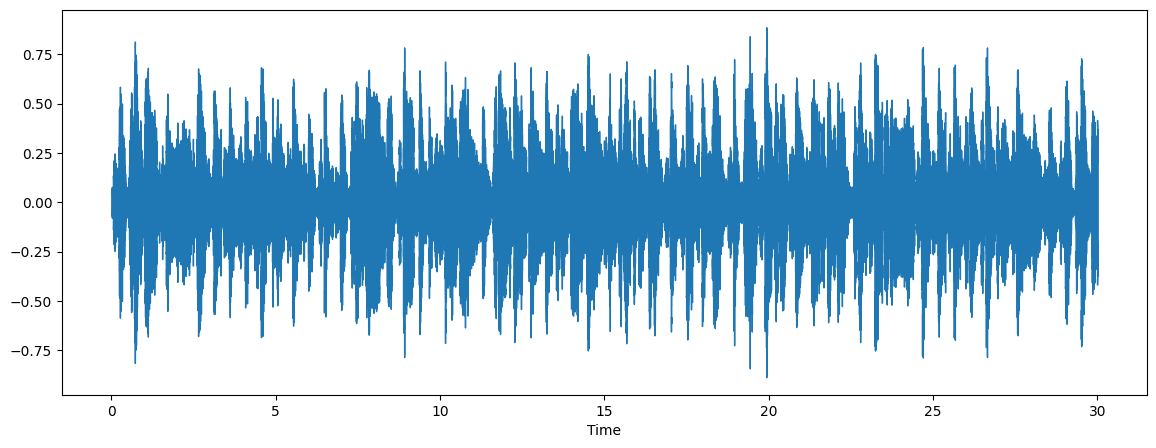

In [4]:
x, sr=librosa.load(random_fiel, sr=44100)
plt.figure(figsize=(14,5))
librosa.display.waveshow(x, sr=sr)

#### This visulization shows us that if we take the whole audio input we will not be able to train our model properly as there is inteference so we need to divide this one audio of 30 sec to 4 sec sub audio with overlap duration of 2 sec.

### Diving single audio file

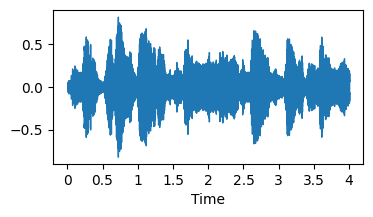

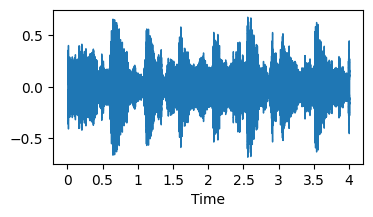

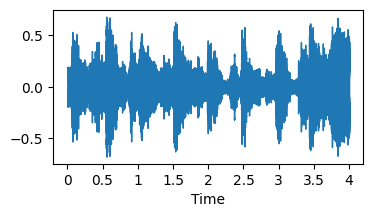

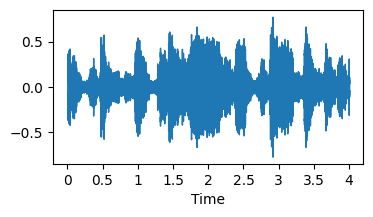

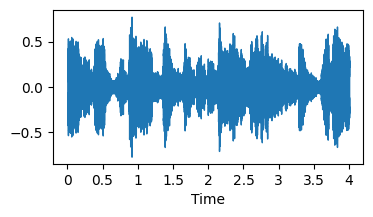

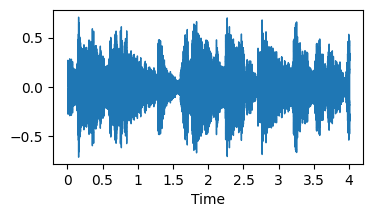

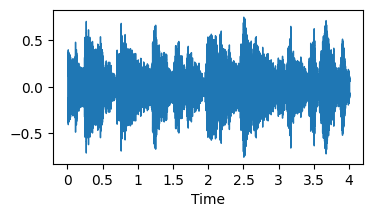

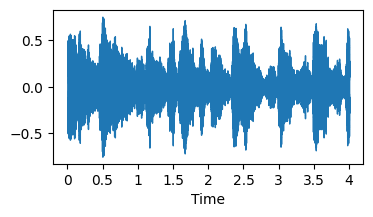

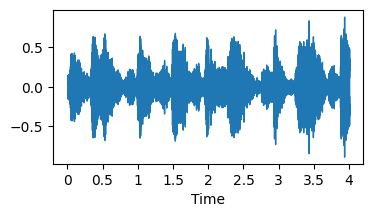

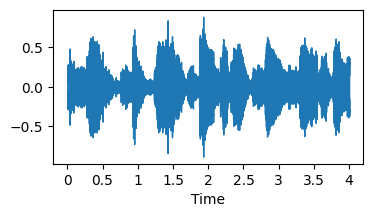

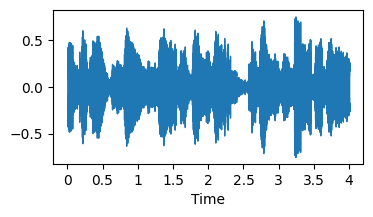

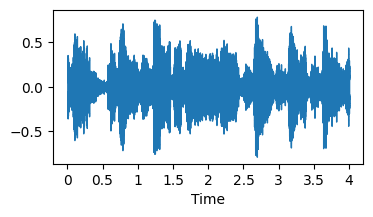

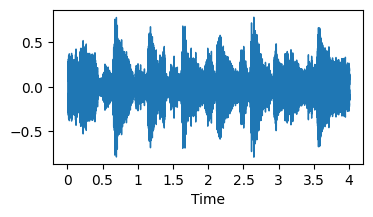

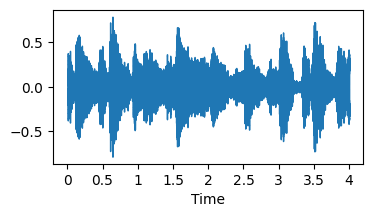

In [5]:
y, sr=librosa.load(random_fiel, sr=None)
chunk_duration=4
overlap_duration=2

chunk_samples=chunk_duration*sr
overlap_samples=overlap_duration*sr

num_chunks=int(np.ceil(len(y)-chunk_samples)/(chunk_samples - overlap_samples)) + 1

for i in range(num_chunks):
    start=i*(chunk_samples - overlap_samples)
    end=start+chunk_samples
    chunk=y[start:end]
    plt.figure(figsize=(4,2))
    librosa.display.waveshow(chunk, sr=sr)
    plt.show()
    
    



In [6]:
y

array([ 0.00732422,  0.01660156,  0.00762939, ..., -0.05560303,
       -0.06106567, -0.06417847], dtype=float32)

# Plotting Melspectogram

In [7]:
"""
Why Mel Spectrograms are used for Audio Classification:

1. Human Perception Alignment:
   - Mel scale mirrors human hearing sensitivity
   - More sensitive to changes in lower frequencies than higher ones
   - Provides better features for speech/music recognition tasks

2. Dimensionality Reduction:
   - Converts complex waveforms into compact 2D representations
   - Reduces input size while preserving important features
   - More efficient training compared to raw audio

3. Time-Frequency Information:
   - Captures both temporal and frequency patterns
   - Shows how frequency content changes over time
   - Helps identify patterns like pitch, rhythm, and timbre

4. CNN Compatibility:
   - Creates image-like 2D matrices
   - Perfect for Convolutional Neural Networks
   - Leverages successful computer vision architectures

5. Feature Extraction:
   - Automatically extracts relevant acoustic features
   - Includes energy distribution across frequencies
   - Preserves harmonic structures important for classification

Parameters:
- n_mels: Number of Mel bands (usually 128)
- n_fft: FFT window size (typically 2048)
- hop_length: Number of samples between frames
- sr: Sample rate of input audio
"""

'\nWhy Mel Spectrograms are used for Audio Classification:\n\n1. Human Perception Alignment:\n   - Mel scale mirrors human hearing sensitivity\n   - More sensitive to changes in lower frequencies than higher ones\n   - Provides better features for speech/music recognition tasks\n\n2. Dimensionality Reduction:\n   - Converts complex waveforms into compact 2D representations\n   - Reduces input size while preserving important features\n   - More efficient training compared to raw audio\n\n3. Time-Frequency Information:\n   - Captures both temporal and frequency patterns\n   - Shows how frequency content changes over time\n   - Helps identify patterns like pitch, rhythm, and timbre\n\n4. CNN Compatibility:\n   - Creates image-like 2D matrices\n   - Perfect for Convolutional Neural Networks\n   - Leverages successful computer vision architectures\n\n5. Feature Extraction:\n   - Automatically extracts relevant acoustic features\n   - Includes energy distribution across frequencies\n   - Pre

In [8]:
def plot_melspectogram(y, sr):
    spectogram=librosa.feature.melspectrogram(y=y, sr=sr)
    spectogram_db=librosa.power_to_db(spectogram, ref=np.max)
    plt.figure(figsize=(10,4))
    librosa.display.specshow(spectogram_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%1.0f dB')
    plt.title("Spectogram")
    # plt.tight_layout()
    plt.show()
    
    
    

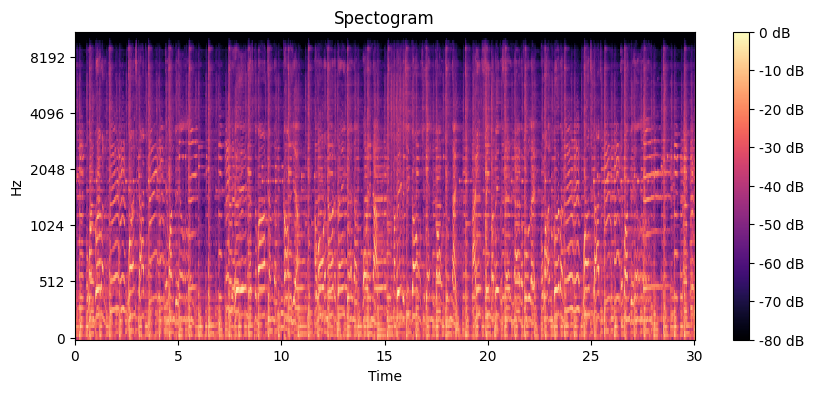

In [9]:
plot_melspectogram(y, sr)

#### This again shows us that we can't take for single audio file, we need to divide this audio file to get better visual of our audio.

In [10]:
def melspectrogram_chunks(y, sr):
    chunk_duration=4
    overlap_duration=2
    
    chunk_samples=chunk_duration*sr
    overlap_samples=overlap_duration*sr
    
    num_chunks=int(np.ceil(len(y)-chunk_samples)/(chunk_samples - overlap_samples)) + 1
    
    for i in range(num_chunks):
        start=i*(chunk_samples - overlap_samples)
        end=start+chunk_samples
        chunk=y[start:end]
        spectogram=librosa.feature.melspectrogram(y=chunk, sr=sr)
        spectogram_db=librosa.power_to_db(spectogram, ref=np.max)
        print(spectogram.shape)
        plt.figure(figsize=(4,2))
        librosa.display.specshow(spectogram_db, sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%1.0f dB')
        plt.title("Spectogram")
        # plt.tight_layout()
        plt.show()

(128, 173)


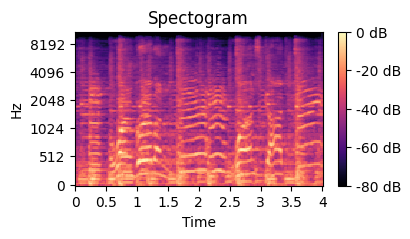

(128, 173)


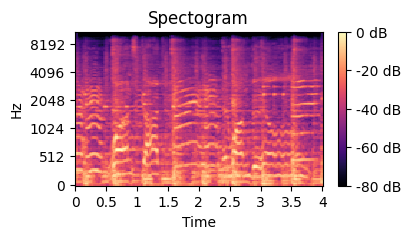

(128, 173)


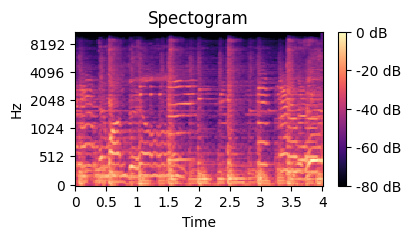

(128, 173)


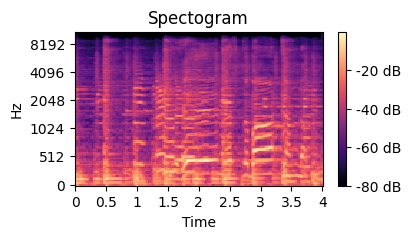

(128, 173)


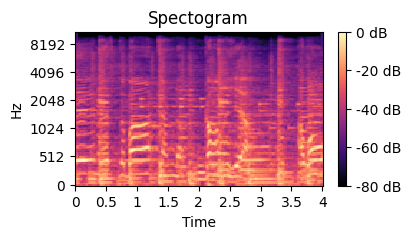

(128, 173)


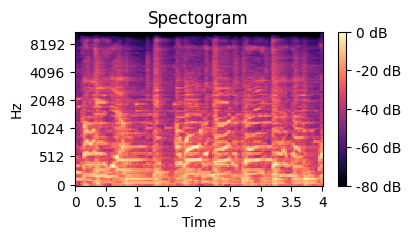

(128, 173)


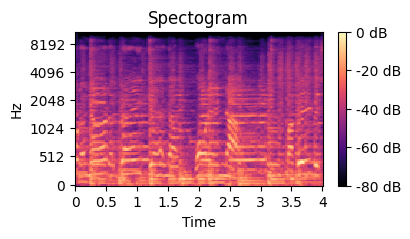

(128, 173)


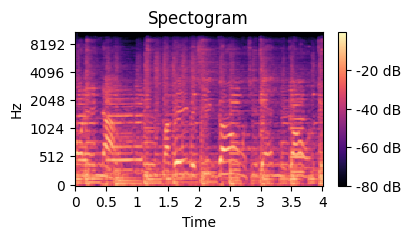

(128, 173)


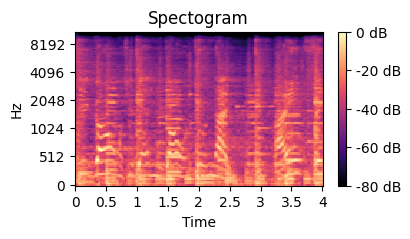

(128, 173)


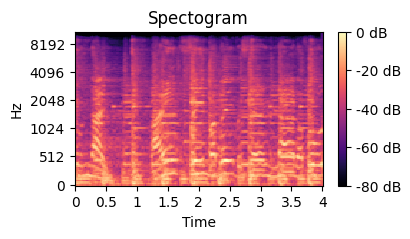

(128, 173)


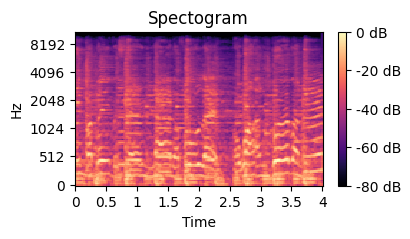

(128, 173)


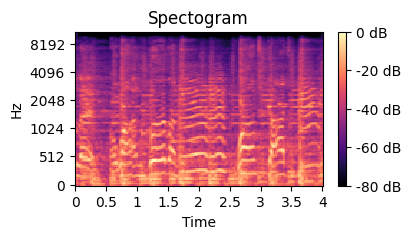

(128, 173)


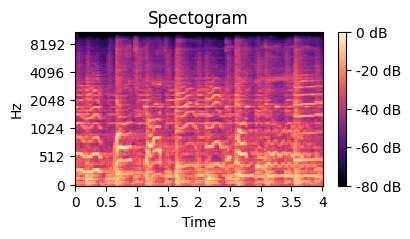

(128, 173)


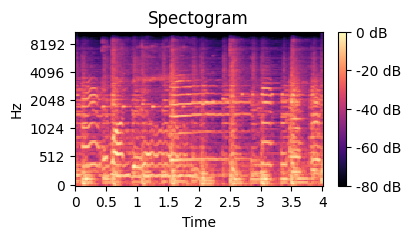

In [11]:
melspectrogram_chunks(y, sr)

## 

# Data Preprocessing

In [12]:
classes = ['blues', 'classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

In [13]:
from tensorflow.image import resize

In [14]:
def add_noise(y, noise_level=0.005):
    return y + noise_level * np.random.randn(len(y))
def time_stretch(y, rate=1.1):
    return librosa.effects.time_stretch(y, rate)
def time_shift(y, sr, shift_max=2):
    shift = int(np.random.uniform(-shift_max * sr, shift_max * sr))
    return np.roll(y, shift)


In [15]:
def data_pre_processing(directory_path, classes, target_shape=(210,210)):
    data = []
    labels = []
    for index, label in enumerate(classes):
        folder_path = os.path.join(directory_path, label)
        print("working with", label)
        
        for file_name in os.listdir(folder_path):
            if file_name.endswith('.wav'):
                file_path = os.path.join(folder_path, file_name)
                try:
                    # Add error handling for loading
                    y, sr = librosa.load(file_path, sr=None, duration=30)  # limit duration to avoid memory issues
                    # print(f"Successfully loaded {file_name}")
                    # Another attempt
                    def add_noise(y, noise_level=0.005):
                        return y + noise_level * np.random.randn(len(y))
                    
                    def time_stretch(y, rate=1.1):
                        return librosa.effects.time_stretch(y, rate)  # Only takes 'y' and 'rate'
                    
                    def time_shift(y, sr, shift_max=2):
                        shift = int(np.random.uniform(-shift_max * sr, shift_max * sr))
                        return np.roll(y, shift)
                    # Attempt end

                    
                    chunk_duration = 4
                    overlap_duration = 2
                    
                    chunk_samples = chunk_duration * sr
                    overlap_samples = overlap_duration * sr
                    
                    num_chunks = int(np.ceil((len(y) - chunk_samples)/(chunk_samples - overlap_samples))) + 1
                    
                    for i in range(num_chunks):
                        start = i * (chunk_samples - overlap_samples)
                        end = start + chunk_samples
                        
                        # Make sure we don't go beyond array bounds
                        if end > len(y):
                            # Pad with zeros if necessary
                            chunk = np.pad(y[start:], (0, end - len(y)))
                        else:
                            chunk = y[start:end]
                            
                        mel_spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sr)
                        # Try to reduce stuff
                        mel_spectrogram = librosa.power_to_db(librosa.feature.melspectrogram(y=chunk, sr=sr), ref=np.max)
                        mel_spectrogram = (mel_spectrogram - np.mean(mel_spectrogram)) / np.std(mel_spectrogram)  # Standardization
                        # Try end
                        mel_spectrogram = resize(np.expand_dims(mel_spectrogram, axis=-1), target_shape)
                        data.append(mel_spectrogram)
                        labels.append(index)
                        
                except Exception as e:
                    print(f"Error processing {file_name}: {str(e)}")
                    print('gg')
                    continue
                    
    return np.array(data), np.array(labels)

In [16]:
directory_path="/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original"
data,label=data_pre_processing(directory_path,classes,target_shape=(210,210))
# We tae the target shape 210x210 as the original shape is (128, 173),
# and if we multiply they come around same so less data is lost
# error detection to remove corrupted file like this

working with blues
working with classical
working with country
working with disco
working with hiphop
working with jazz


<ipython-input-15-8620de2eb506>:13: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None, duration=30)  # limit duration to avoid memory issues
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing jazz.00054.wav: 
gg
working with metal
working with pop
working with reggae
working with rock


In [17]:
data.shape

(13986, 210, 210, 1)

In [18]:
label.shape

(13986,)

In [19]:
from tensorflow.keras.utils import to_categorical
label=to_categorical(label,num_classes=len(classes))
print(label)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test=train_test_split(data,label,test_size=0.2, random_state=42)

In [21]:
X_train.shape

(11188, 210, 210, 1)

In [22]:
X_test.shape

(2798, 210, 210, 1)

# Model Architecture

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
model=Sequential()

In [24]:
from tensorflow.keras.regularizers import l2

model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=X_train[0].shape, kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.4))

model.add(Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.0005)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.0005)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.4))

# model.add(Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.5))  # Increase dropout slightly in deeper layers

model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(len(classes), activation='softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 210, 210, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 210, 210, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 210, 210, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 210, 210, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 70, 70, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 70, 70, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 70, 70, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 70, 70, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 70, 70, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 70, 70, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 23, 23, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 23, 23, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 23, 23, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 23, 23, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 324,842 (1.24 MB)

 Trainable params: 323,434 (1.23 MB)

 Non-trainable params: 1,408 (5.50 KB)

# Training

In [25]:
model.compile(loss="binary_crossentropy", optimizer='adam',
              metrics=['accuracy'])


checkpoint_filepath = '/tmp/ckpt/checkpoint.model.keras'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# Model is saved at the end of every epoch, if it's the best seen so far.
hist=model.fit(X_train,y_train,epochs=30,batch_size=64,validation_data=(X_test,y_test))

Epoch 1/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 74s 294ms/step - accuracy: 0.2956 - loss: 1.0257 - val_accuracy: 0.0979 - val_loss: 0.8348
Epoch 2/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 28s 158ms/step - accuracy: 0.6072 - loss: 0.4659 - val_accuracy: 0.0979 - val_loss: 0.9832
Epoch 3/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 28s 161ms/step - accuracy: 0.7195 - loss: 0.3214 - val_accuracy: 0.1590 - val_loss: 0.8208
Epoch 4/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 28s 159ms/step - accuracy: 0.7604 - loss: 0.2471 - val_accuracy: 0.4482 - val_loss: 0.4604
Epoch 5/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 28s 159ms/step - accuracy: 0.8000 - loss: 0.2012 - val_accuracy: 0.5965 - val_loss: 0.3102
Epoch 6/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 28s 160ms/step - accuracy: 0.8215 - loss: 0.1786 - val_accuracy: 0.5179 - val_loss: 0.4510
Epoch 7/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 28s 160ms/step - accuracy: 0.8476 - loss: 0.1603 - val_accuracy: 0.5590 - val_loss: 0.2856
Epoch 8/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 28s 160ms/step - accuracy: 0.8454 - loss: 0

In [26]:
model.save("Trained_model.h5") #WSave md


# Evaluation

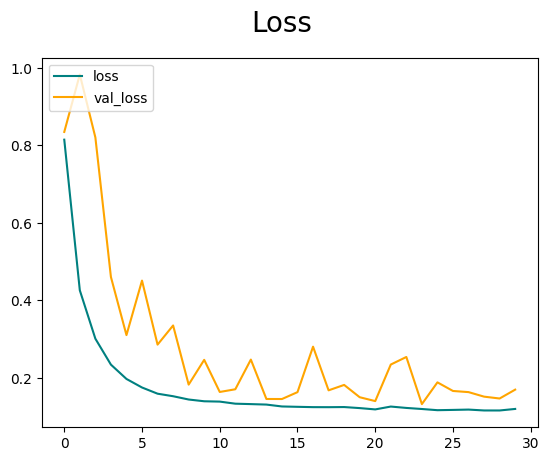

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

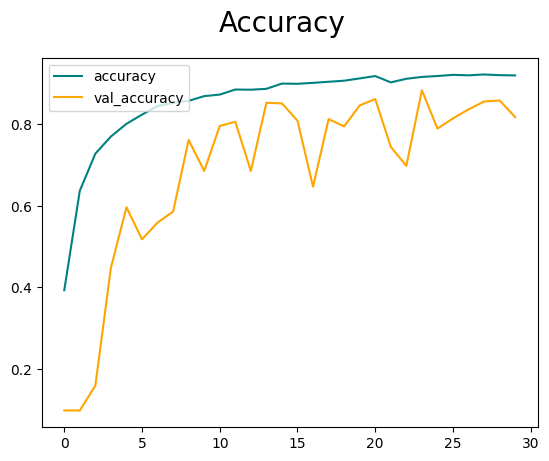

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()